<a href="https://colab.research.google.com/github/ttogle918/AI_projects/blob/master/s1_vgame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "다음 분기에 어떤 게임을 설계해야 할까"를 도출하는 과정 / 결과 보여주기

dataset read, 어떤 게임을 만들어야 하는지 결론 도출

요구사항.
- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

-----------------

data 이름 설명
+ Name : 게임의 이름입니다.
+ Platform : 게임이 지원되는 플랫폼의 이름입니다.
+ Year : 게임이 출시된 연도입니다.
+ Genre : 게임의 장르입니다.
+ Publisher : 게임을 제작한 회사입니다.
+ NA_Sales : 북미지역에서의 출고량입니다.
+ EU_Sales : 유럽지역에서의 출고량입니다.
+ JP_Sales : 일본지역에서의 출고량입니다.
+ Other_Sales : 기타지역에서의 출고량입니다.


-----------------
부가설명

아래 Sales의 기준은 100만(M)이다.
- 1k = one thousand (1,000)
- 10k = ten thousand (10,000)
- 100k = 100 thousand (100,000)
- 1M = 1000K (100만)

In [1]:
# google drive에서 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# csv파일 불러오기
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/vgames2.csv", engine='python')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
def toFloat(n) :
  try :
    return float(n)
  except ValueError :
    if n[-1] == 'M' :
      return float(n[0:-1])
    elif n[-1] == 'K' :
      return float(n[0:-1])/1000
    else :
      print(n)
  return 'cannot toInt' # 1개라도 있으면 dtype이 object가 됨

def setYear(y) :
  if y > 2021 :
    print(y)
    return '-1'
  if y > 99 :
    return int(y)
  elif y < 22 :
    return int(2000 + y)
  elif y > 21 :
    return int(1900 + y)

# 계산을 위해 data를 숫자형으로 변환 
df['NA_Sales'] = df['NA_Sales'].apply(toFloat)
df['EU_Sales'] = df['EU_Sales'].apply(toFloat)
df['JP_Sales'] = df['JP_Sales'].apply(toFloat)
df['Other_Sales'] = df['Other_Sales'].apply(toFloat)

df['Year'] = df['Year'].apply(setYear)
df.isnull().sum() # 혹시나 0년 == 2000년일 수도 있으니까 year 변환 뒤 nan을 0으로 치환
df['Year'] = df['Year'].fillna(0)
print("min year ", min(df['Year']) )
print("max NA_Sales", max(df['NA_Sales']) )

min year  0.0
max NA_Sales 41.49


In [43]:
# # 연도 등록
# def generation(n) :
#   return int(n / 100)

# df['generation'] = df['Year'].apply(generation)
# df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01
15,Mini Ninjas,PS3,2009.0,Action,Eidos Interactive,0.14,0.16,0.00,0.06
...,...,...,...,...,...,...,...,...,...
16575,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08
16581,LEGO The Hobbit,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02
16583,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009.0,Action,Activision,0.91,0.39,0.00,0.13
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00


In [68]:
import matplotlib.pyplot as plt
import numpy as np
# wide = df[df['Year', 'Genre']]
wide = df.pivot_table(index = 'Year', columns = 'Genre', values = 'Name', aggfunc=len)
wide = wide.fillna(0)
wide = wide[1:]
wide.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1981.0,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982.0,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
1983.0,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0


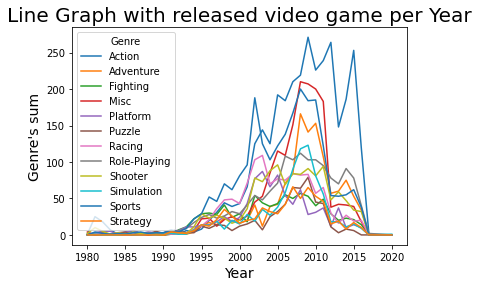

In [69]:
wide.plot.line()
plt.title('Line Graph with released video game per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre\'s sum', fontsize=14)
plt.show()

In [82]:
labels = set(df['Genre'])
index = np.arange(len(labels))
labels

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 nan}

나라별 장르 판매량의 평균 비교 (2015년부터 최근까지)

Action은 너무 폭이 넓고 puzzle은 좁다. 이런걸 scaling 할 수 있을까?

NA_Sales와 EU_Sales의 각각의 평균을 구한 뒤, 가설검정 가능?

or 개발 후, 차이가 작으면 두군데, 차이가 크면 한군데 출시한다고 생각했을 때, 가설검정 가능할 것 같다.

어떤 장르로할지? 어떤 플랫폼으로할지?도 비교하면 좋을것 같다.
ps끼리 ds끼리 묶기.


In [87]:
df_sample = df[df['Year'] >= 2015]
df_country = pd.DataFrame()

def makeSample(string, df1, df_s) :
  return df_s[df['Genre'] == string].sum

df_country.apply(makeSample)

""


 Two-Sample T-test.

 가설검정 예시.
 'Na_Sales(북미지역)'에서의 판매량은 'EU_Sales(유럽지역)'에서의 판매량과 같다(비슷하다)

In [ ]:
# scipy를 upgrade해야 아래 코드 실행 가능.
# !pip install --upgrade scipy  

In [ ]:
from scipy import stats
import numpy as np
game1 = pd.to_numeric(df['NA_Sales'])
game2 = pd.to_numeric(df['EU_Sales'])

print("Na :", np.mean(game1))
print("Na sum:", np.sum(game1))

print("EU :", np.mean(game2))
print("EU sum:", np.sum(game2))
sta, pv = stats.ttest_ind(game1, game2)

print(sta, pv)

Na : 0.26466742981082814
Na sum: 4392.95
EU : 0.14665200626581526
EU sum: 2434.13
15.831371100049903 3.0384925458019944e-56
